Predicted Prices: [353999.99999999]
Actual Prices:    [350000]

Estimated Price for 2800 sqft, 4 bed, 3 bath: 466000.0


D:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


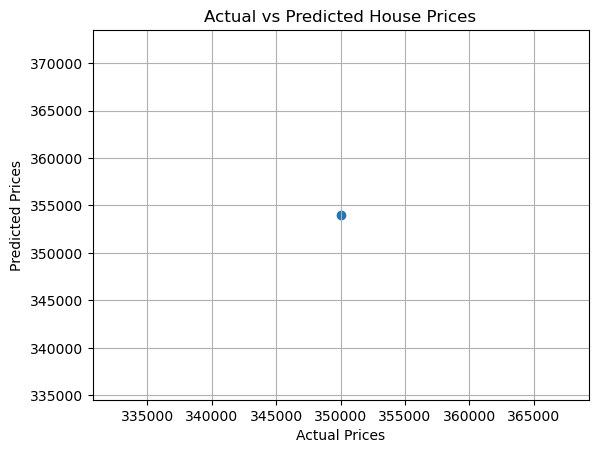

In [ ]:
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load uploaded CSV
@st.cache_data
def load_data():
    return pd.read_csv("/mnt/data/train.csv")

df = load_data()

# Display some basic info
st.title("🏠 House Price Prediction App")
st.markdown("Using **Linear Regression** on uploaded data")

st.subheader("📂 Sample Data from CSV")
st.write(df.head())

# Select features automatically if present
possible_features = ['SquareFeet', 'Bedrooms', 'Bathrooms', 'Price']
if not all(feature in df.columns for feature in possible_features):
    st.error("CSV must contain: 'SquareFeet', 'Bedrooms', 'Bathrooms', and 'Price' columns.")
    st.stop()

# Train model
X = df[['SquareFeet', 'Bedrooms', 'Bathrooms']]
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Input from user
st.subheader("🔢 Enter House Details")
sqft = st.number_input("Total Square Feet", min_value=300, max_value=10000, value=1500)
bedrooms = st.number_input("Number of Bedrooms", min_value=1, max_value=10, value=3)
bathrooms = st.number_input("Number of Bathrooms", min_value=1, max_value=10, value=2)

if st.button("📊 Predict Price"):
    input_features = np.array([[sqft, bedrooms, bathrooms]])
    predicted_price = model.predict(input_features)[0]
    st.success(f"💰 Estimated House Price: ₹ {round(predicted_price, 2):,}")

# Optional: show prediction vs actual
with st.expander("📉 Actual vs Predicted on Test Set"):
    y_pred = model.predict(X_test)
    comparison_df = pd.DataFrame({'Actual Price': y_test.values, 'Predicted Price': y_pred})
    st.write(comparison_df)

    # Plot
    fig, ax = plt.subplots()
    ax.scatter(y_test, y_pred, color='blue')
    ax.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
    ax.set_xlabel("Actual Price")
    ax.set_ylabel("Predicted Price")
    ax.set_title("Actual vs Predicted Prices")
    st.pyplot(fig)
